<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/Ai%EC%A4%91%EA%B8%89/AI%EC%8B%A4%EC%8A%B5_8%EC%9B%949%EC%9D%BC(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('sample_data/wine.csv', header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

#검증 이유
##하이퍼파라미터 튜닝
##과적합 감지
##모델 선택
##일반화 성능평가
# model.fit(validation_split)


#학습셋 - 파라미터(w, b) 업데이트
#검증셋 - 하이퍼파라미터 조정, 모델 선택
#테스트셋 - 실제데이터

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                390       
                                                                 
 dense_13 (Dense)            (None, 12)                372       
                                                                 
 dense_14 (Dense)            (None, 8)                 104       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 에포크(하이퍼파라미터) => 순전파, 역전파 50번
## 50번 중 40번이 최적 학습일때 그 모델을 어떻게 불러 사용
## 에포크마다 모델의 정확도를 저장

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)   # 0.8 * 0.25 = 0.2

Epoch 1/50
8/8 [==============================] - 2s 33ms/step - loss: 0.7843 - accuracy: 0.4052 - val_loss: 0.6746 - val_accuracy: 0.8562
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6776 - accuracy: 0.8406 - val_loss: 0.6667 - val_accuracy: 0.8608
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6652 - accuracy: 0.8894 - val_loss: 0.6583 - val_accuracy: 0.9031
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6567 - accuracy: 0.9140 - val_loss: 0.6491 - val_accuracy: 0.9046
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6456 - accuracy: 0.9112 - val_loss: 0.6359 - val_accuracy: 0.8938
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6327 - accuracy: 0.9053 - val_loss: 0.6212 - val_accuracy: 0.9069
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6172 - accuracy: 0.9151 - val_loss: 0.6038 - val_accuracy: 0.9046
Epoch 8/50
8/8 [===============

In [ ]:
score = model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.1413 - accuracy: 0.9492


In [ ]:
print('Test accuracy:', score[1])

Test accuracy: 0.9492307901382446


In [ ]:
modelpath = "sample_data/tfile/{epoch:02d}-{val_accuracy:.4f}.hdf5"

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to sample_data/tfile/01-0.9492.hdf5

Epoch 2: saving model to sample_data/tfile/02-0.9462.hdf5

Epoch 3: saving model to sample_data/tfile/03-0.9469.hdf5

Epoch 4: saving model to sample_data/tfile/04-0.9515.hdf5

Epoch 5: saving model to sample_data/tfile/05-0.9462.hdf5

Epoch 6: saving model to sample_data/tfile/06-0.9500.hdf5

Epoch 7: saving model to sample_data/tfile/07-0.9508.hdf5

Epoch 8: saving model to sample_data/tfile/08-0.9515.hdf5

Epoch 9: saving model to sample_data/tfile/09-0.9508.hdf5

Epoch 10: saving model to sample_data/tfile/10-0.9500.hdf5

Epoch 11: saving model to sample_data/tfile/11-0.9515.hdf5

Epoch 12: saving model to sample_data/tfile/12-0.9531.hdf5

Epoch 13: saving model to sample_data/tfile/13-0.9523.hdf5

Epoch 14: saving model to sample_data/tfile/14-0.9538.hdf5

Epoch 15: saving model to sample_data/tfile/15-0.9577.hdf5

Epoch 16: saving model to sample_data/tfile/16-0.9608.hdf5

Epoch 17: saving model to sample_data/tfile/17-0

In [ ]:
score = model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 0.9762


In [ ]:
print('Test accuracy:', score[1])

Test accuracy: 0.9761538505554199


#그래프 과적합

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=500, validation_split=0.25)

Epoch 1/1000
8/8 [==============================] - 0s 20ms/step - loss: 0.0728 - accuracy: 0.9777 - val_loss: 0.0836 - val_accuracy: 0.9685
Epoch 2/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.0739 - accuracy: 0.9759 - val_loss: 0.0839 - val_accuracy: 0.9692
Epoch 3/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.0700 - accuracy: 0.9772 - val_loss: 0.0830 - val_accuracy: 0.9669
Epoch 4/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0695 - accuracy: 0.9777 - val_loss: 0.0817 - val_accuracy: 0.9700
Epoch 5/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0683 - accuracy: 0.9779 - val_loss: 0.0816 - val_accuracy: 0.9692
Epoch 6/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0690 - accuracy: 0.9779 - val_loss: 0.0845 - val_accuracy: 0.9692
Epoch 7/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0697 - accuracy: 0.9779 - val_loss: 0.0845 - val_accuracy: 0.9700
Epoch 8/1000


In [ ]:
hist_df = pd.DataFrame(history.history)

In [ ]:
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.072753,0.977675,0.083616,0.968462
1,0.073877,0.975879,0.083872,0.969231
2,0.069989,0.977162,0.083011,0.966923
3,0.069484,0.977675,0.081749,0.970000
4,0.068275,0.977932,0.081596,0.969231
...,...,...,...,...
995,0.027645,0.993072,0.064571,0.986923
996,0.026910,0.993072,0.062904,0.986923
997,0.024439,0.993841,0.060836,0.987692
998,0.026355,0.993585,0.061748,0.989231


In [ ]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
x_len = np.arange(len(y_loss))

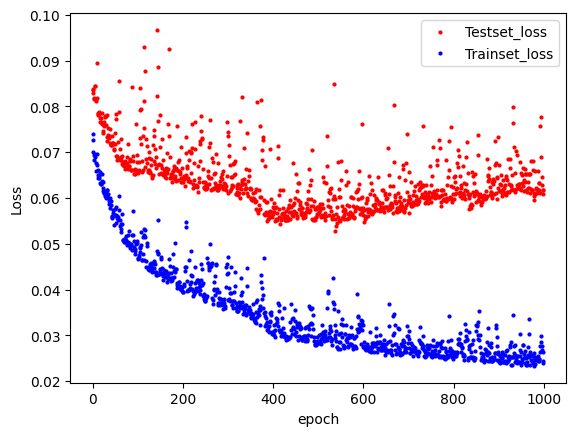

In [ ]:
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label="Testset_loss")
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label="Trainset_loss")

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss',  patience=20)

In [ ]:
modelpath = "sample_data/model/bestmodel.hdf5"

In [ ]:
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=0, save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 1s 36ms/step - loss: 8.7154 - accuracy: 0.1411 - val_loss: 3.6810 - val_accuracy: 0.2285
Epoch 2/2000
8/8 [==============================] - 0s 10ms/step - loss: 1.7770 - accuracy: 0.4965 - val_loss: 0.6110 - val_accuracy: 0.7392
Epoch 3/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.5623 - accuracy: 0.7862 - val_loss: 0.5947 - val_accuracy: 0.7831
Epoch 4/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.5533 - accuracy: 0.8078 - val_loss: 0.5671 - val_accuracy: 0.7977
Epoch 5/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.5114 - accuracy: 0.8209 - val_loss: 0.4950 - val_accuracy: 0.8200
Epoch 6/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.4321 - accuracy: 0.8473 - val_loss: 0.3992 - val_accuracy: 0.8631
Epoch 7/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3430 - accuracy: 0.8799 - val_loss: 0.3355 - val_accuracy: 0.8885
Epoch 8/2000
